<a href="https://colab.research.google.com/github/2018jangminjun/python/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


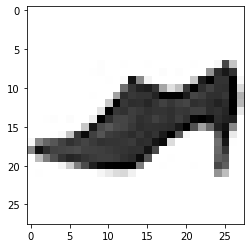

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

type(X_train)

print(X_train.shape)

plt.imshow(X_train[360], cmap='Greys')
plt.show()



In [ ]:
import sys

for x in X_train[360]:
  for i in x:
    sys.stdout.write("%-3s"%i)
  sys.stdout.write('\n') 

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  3  0  0  1  0  0  2  0  0  0  0  0  2  0  0  14 19987 0  
0  0  0  0  0  0  0  0  1  3  0  0  0  0  0  0  0  5  0  4  0  0  0  1292172342140  
0  0  0  0  0  0  0  0  0  0  2  0  10 23813822 0  0  0  0  0  82 23025421321325515 
0  0  0  0  0  0  0  0  0  0  0  0  16521222523021211453 92 20925421620321421625463 
0  0  0  0  0  0  0  0  1  0  0  11721720921321322425425425423120

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[360]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4,4), input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

modelpath="./data/model/MNIST_CNN.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=30, batch_size=100, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.38689, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.38689 to 0.31995, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.31995 to 0.29754, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.29754 to 0.27806, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.27806 to 0.26571, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.26571 to 0.25867, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.25867 to 0.24355, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.24355 to 0.24176, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.24176

Epoch 10: val_loss did not improve from 0.24176

Epoch 11: val_loss improved from 0.24176 to 0.22825, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 12: val_loss did not impro

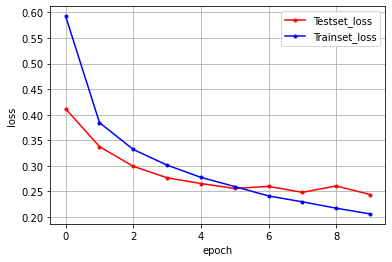

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker='.',c="red", label='Testset_loss')
plt.plot(x_len,y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()